In [ ]:
Julian Guerra Rodriguez C13452
Segunda Parte del Proyecto de Senales y Sistemas IE0247

A continuacion, se presenta el segmento de codigo correspondiente a la parte 1 del proyecto, donde el mismo permite obtener las graficas de 15 señales de electrocardiogramas para visualizar el comportamiento de cada una y sus aspectos principales como la frecuencia, periodo, ciclos y amplitud, entre otros conceptos, ademas de que dichas graficas pretenden ayudar a comprender el fenomeno ocurrido ante la aplicacion de operaciones como las de desplzamiento, escalamiento y reflexion.
Las señales graficadas son las siguientes: a0001.wav,a0002.wav,a0003.wav,a0004.wav,a0005.wav,a0006.wav,a0007.wav,a0008.wav,a0009.wav,a0010.wav,a0011.wav,a0012.wav,a0013.wav,a0014.wav,a00.wav,a0001.wav
Asimismo, el codigo tambien busca centrar la atencion en una señal en particular, que para dicho caso, la escogida fue la a0001.wav. Al analizar mas detalladamente esta ultima señal, el codigo pretende obtener varias graficas de la misma, donde se observen en una de ellas, un pequeño extracto de la senal de forma mas amplia en el tiempo; la segunda grafica, donde se observe solo un ciclo; y la tercer grafica, este conformada por tres ciclos de la señal.

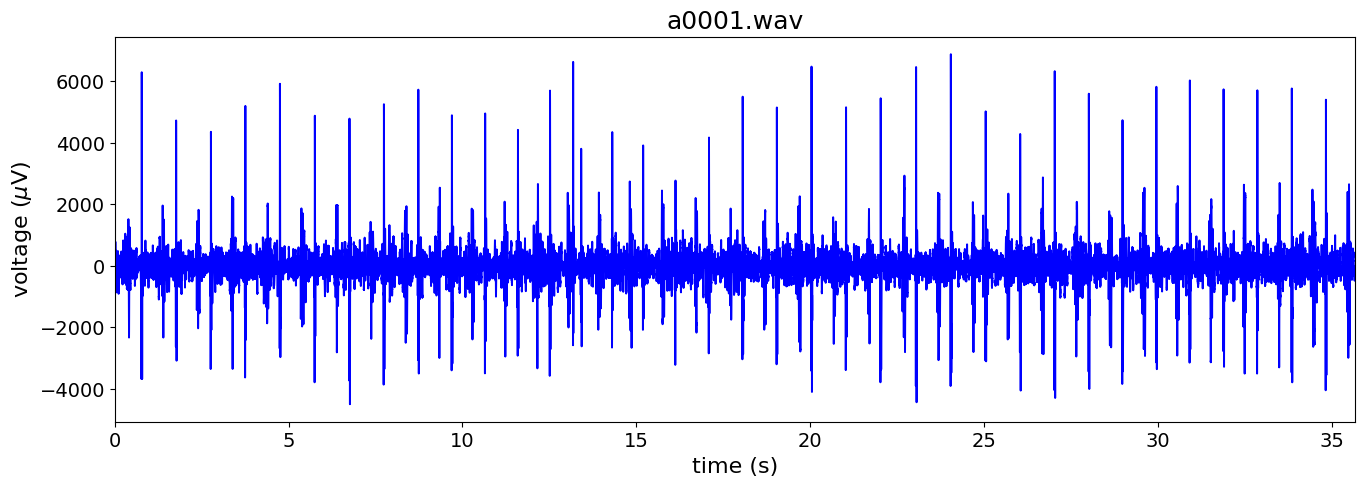

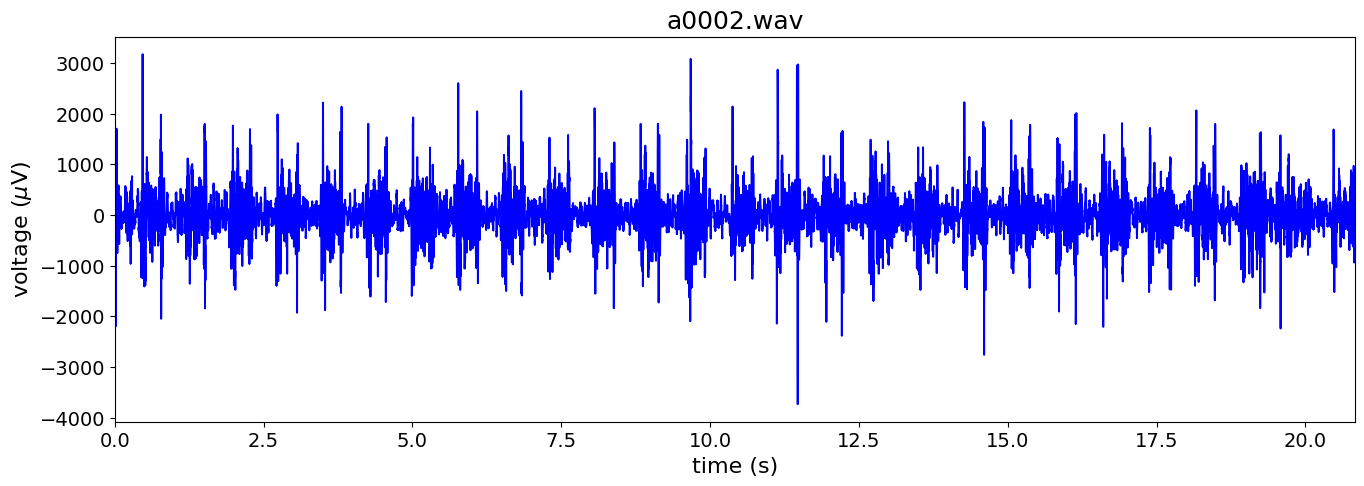

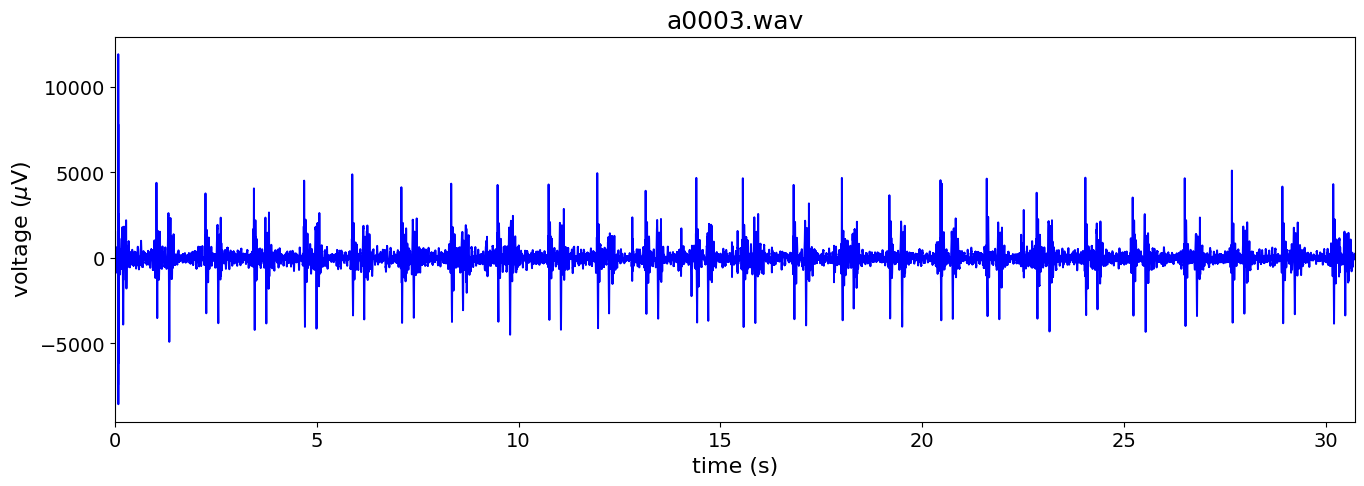

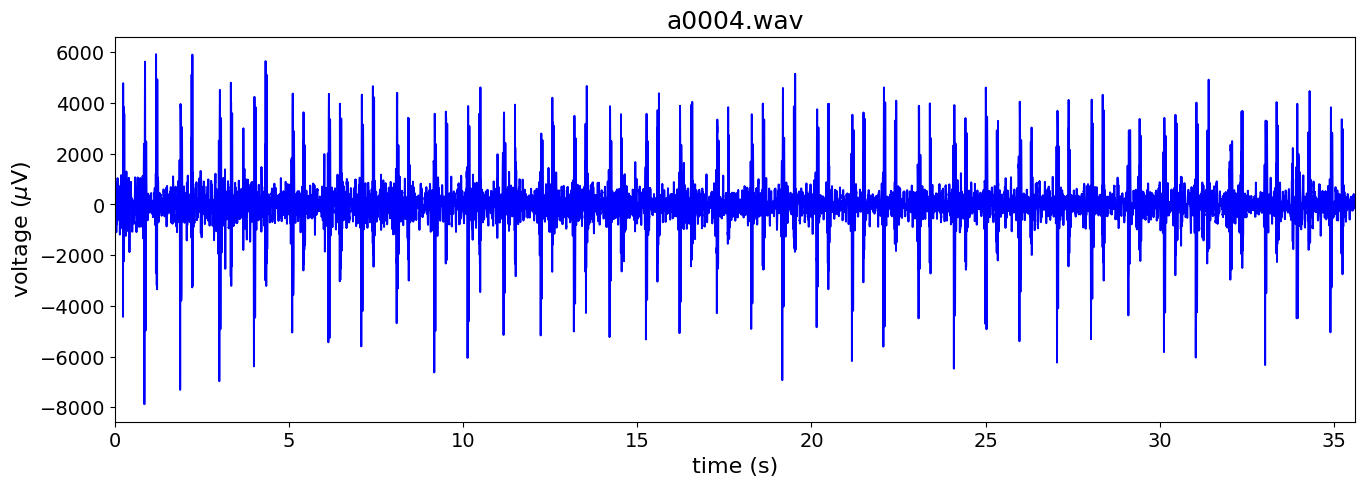

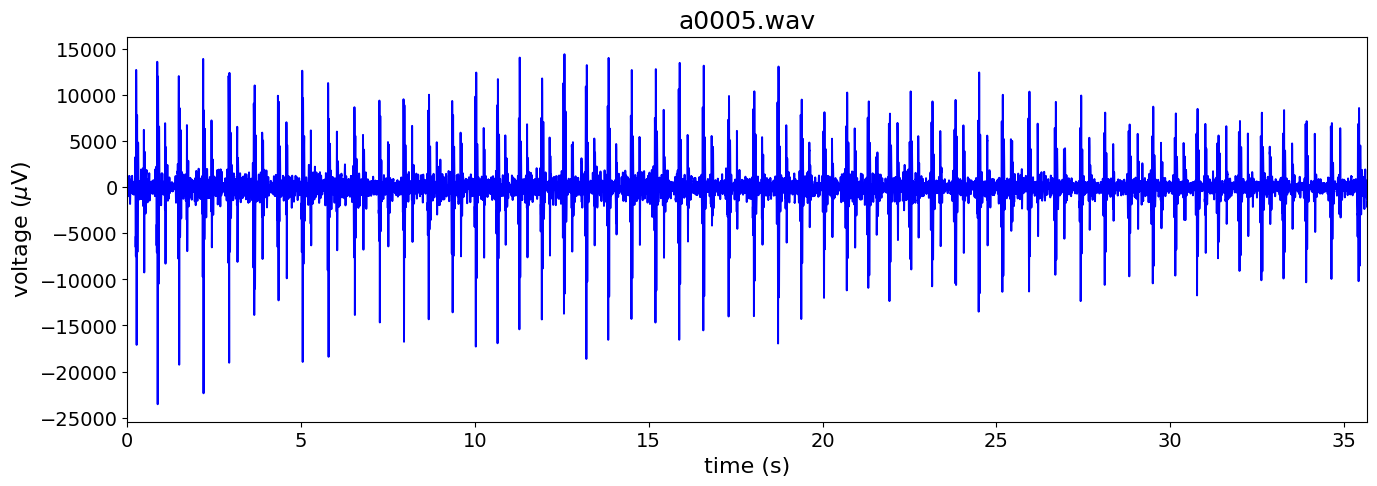

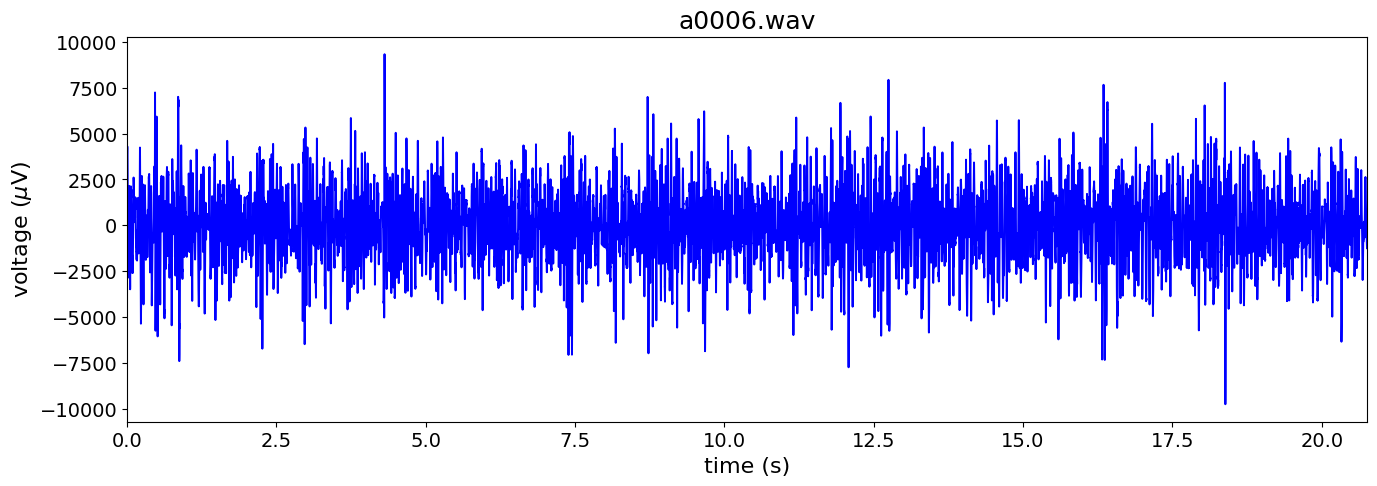

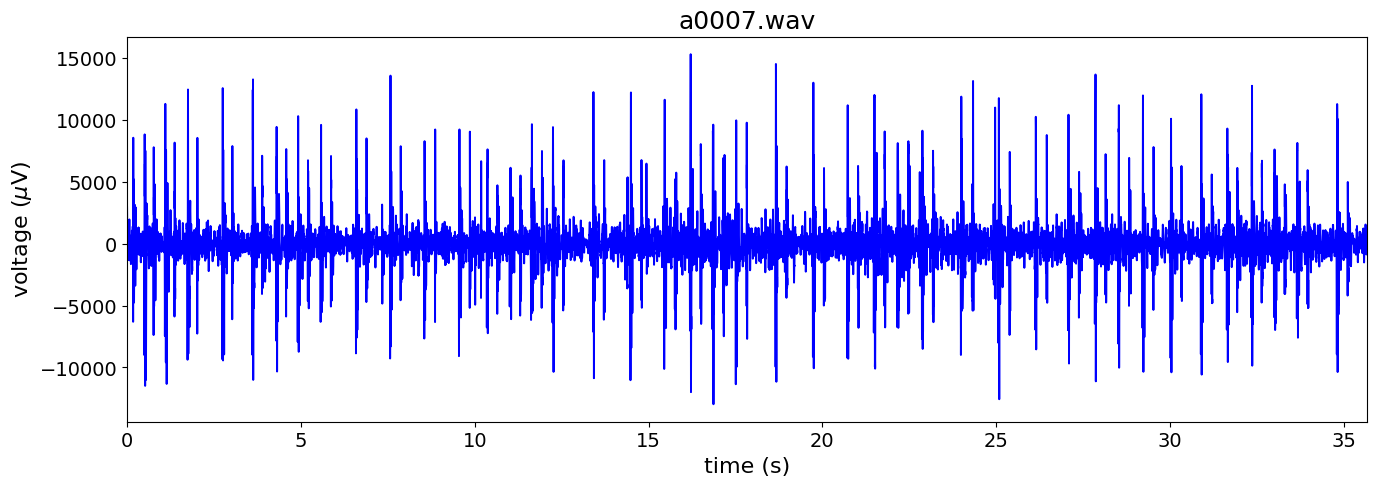

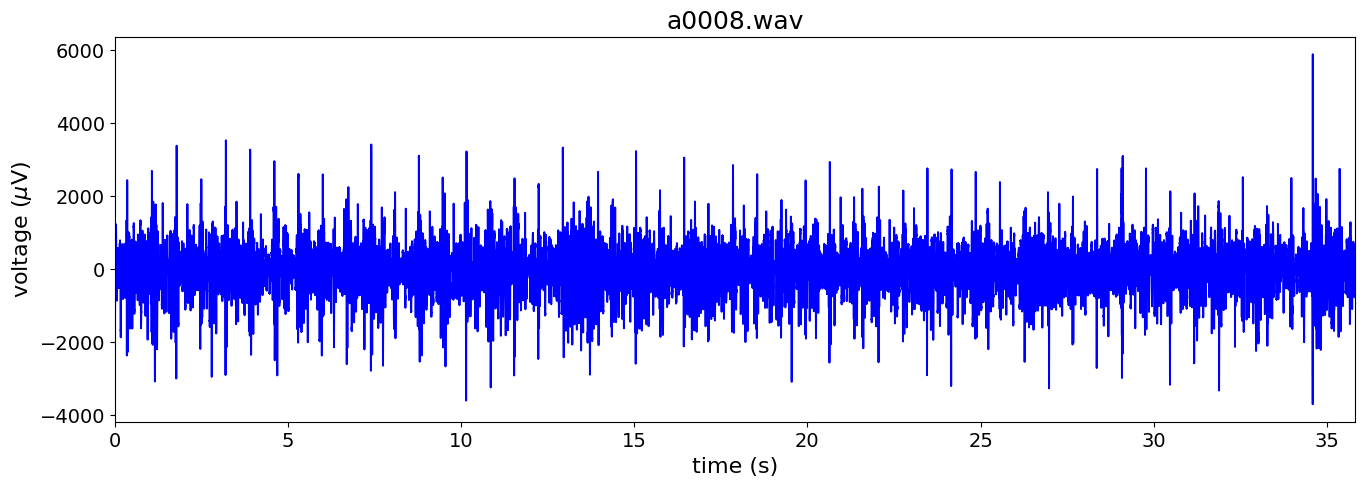

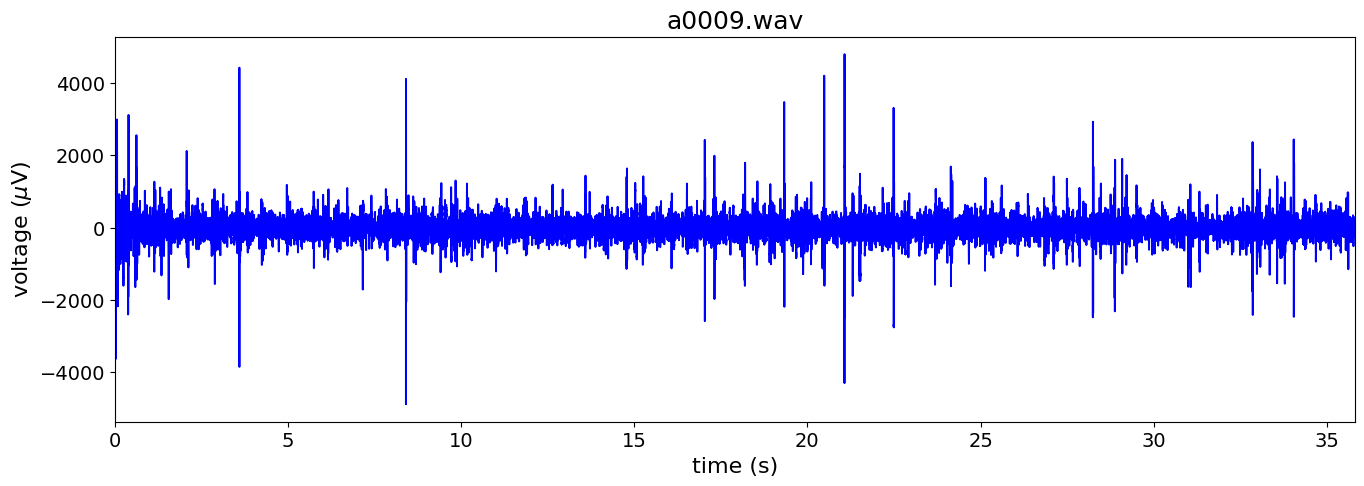

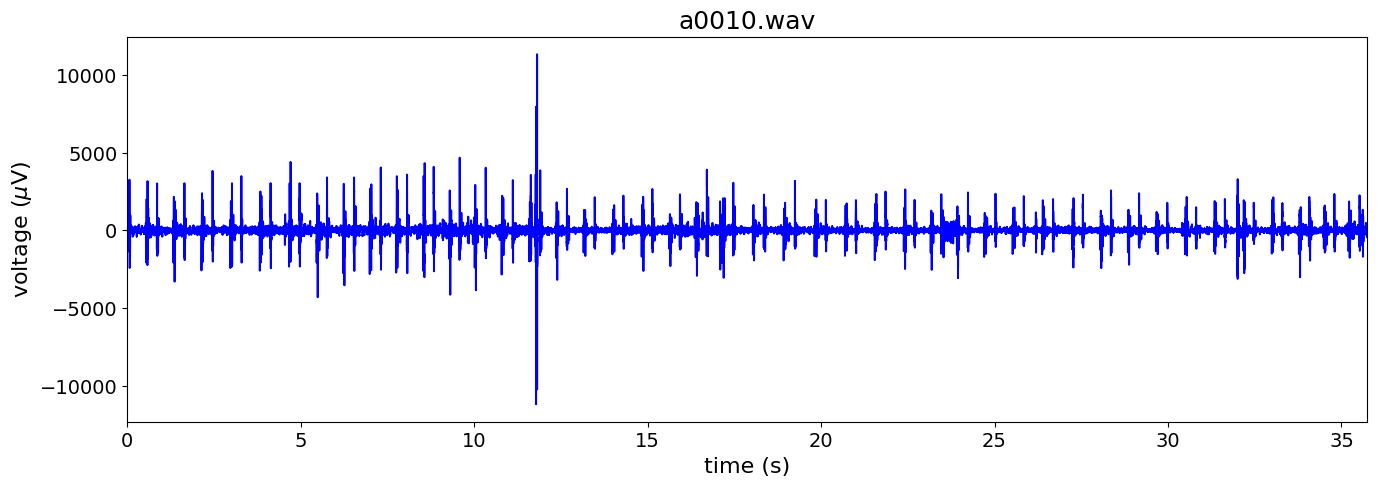

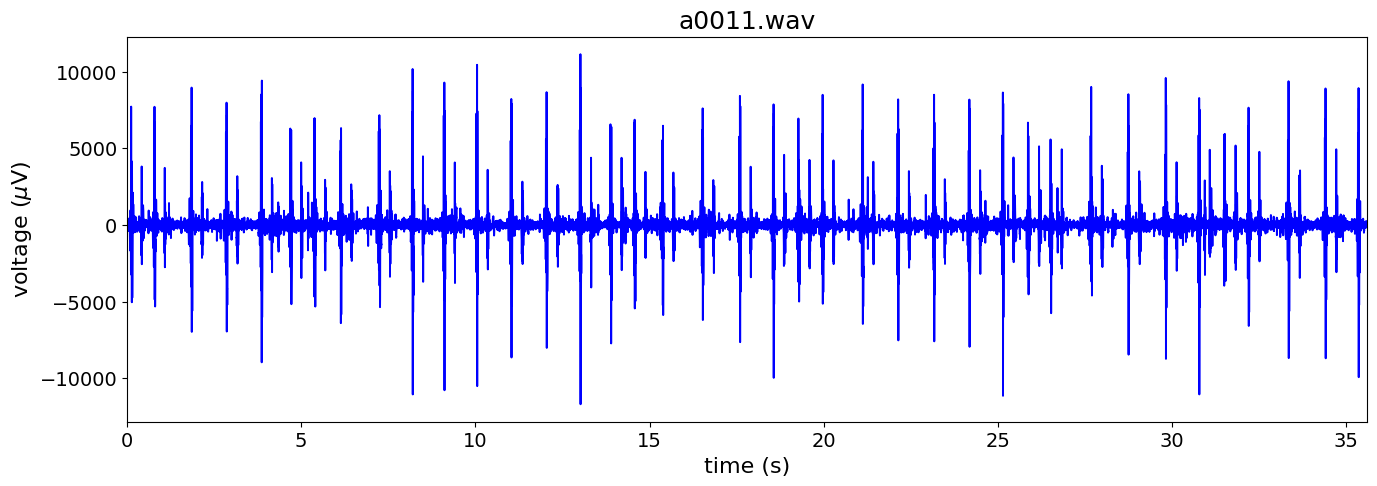

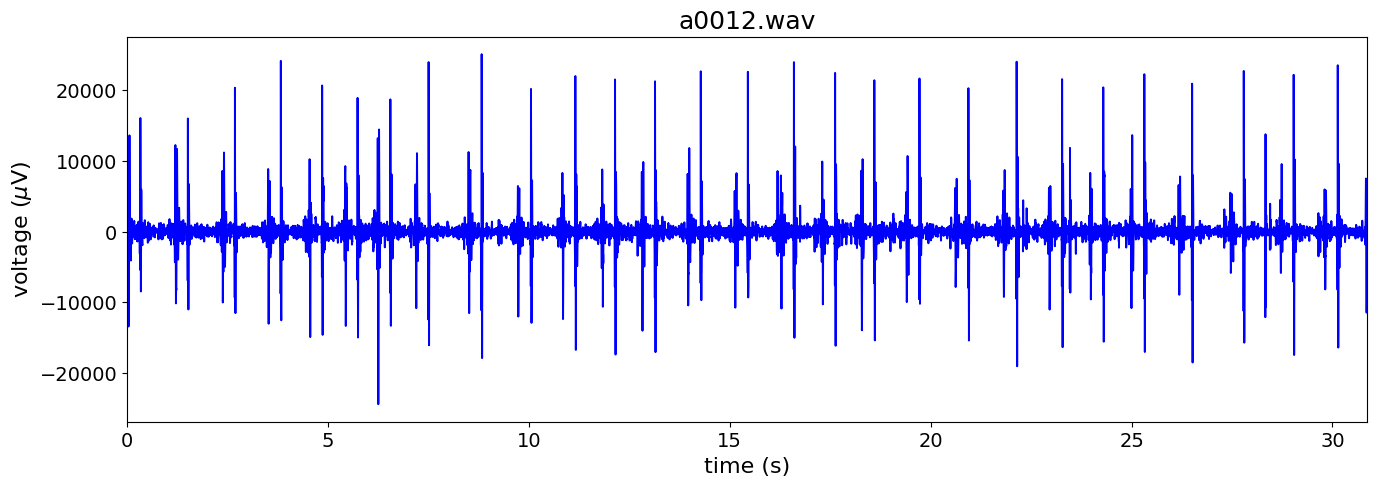

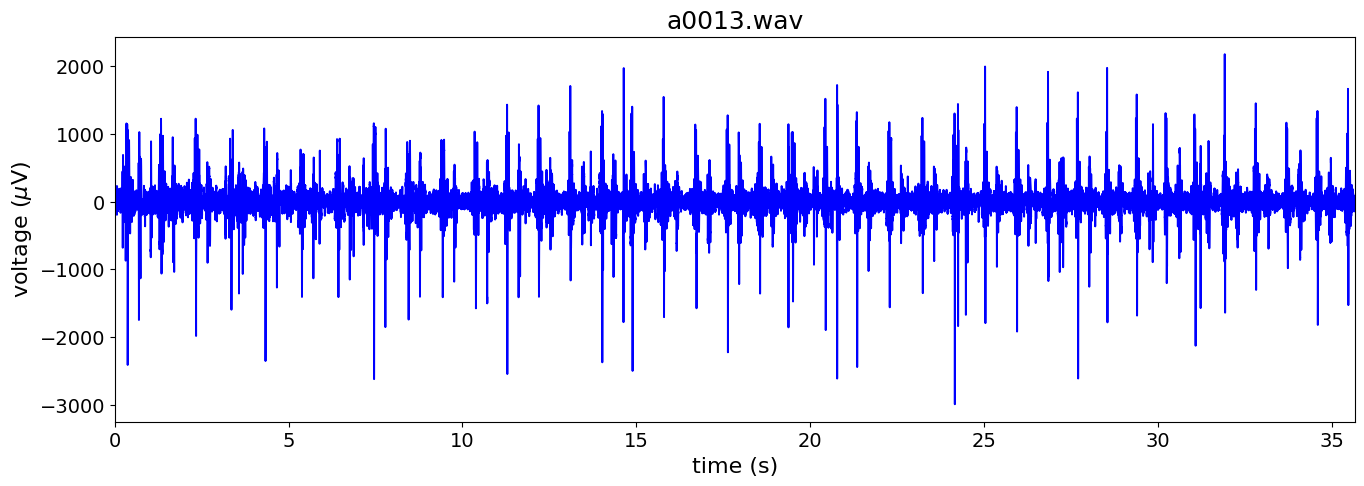

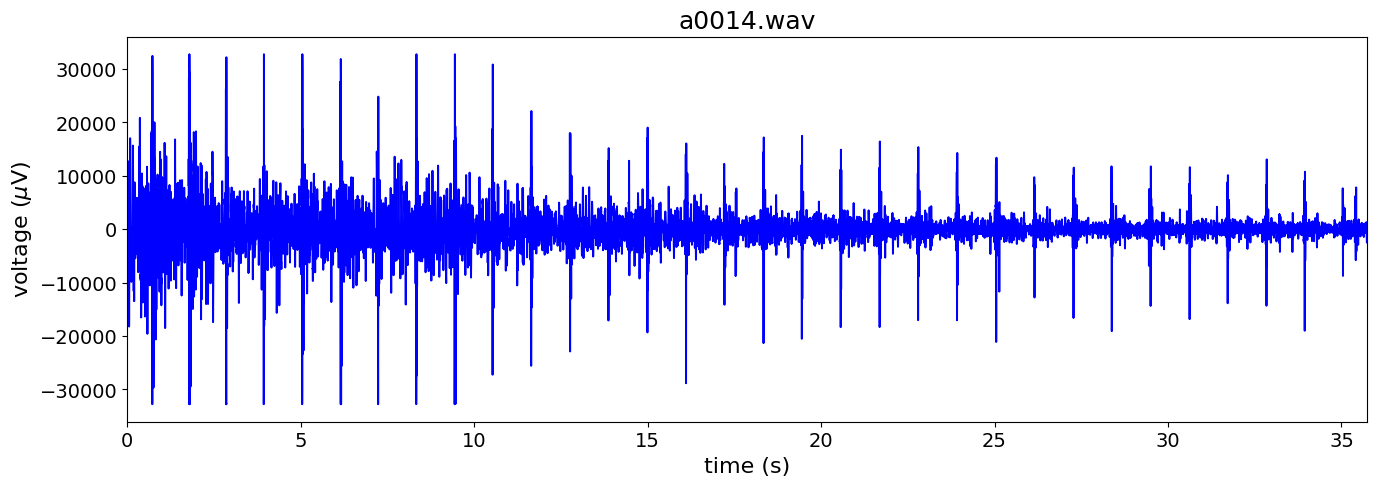

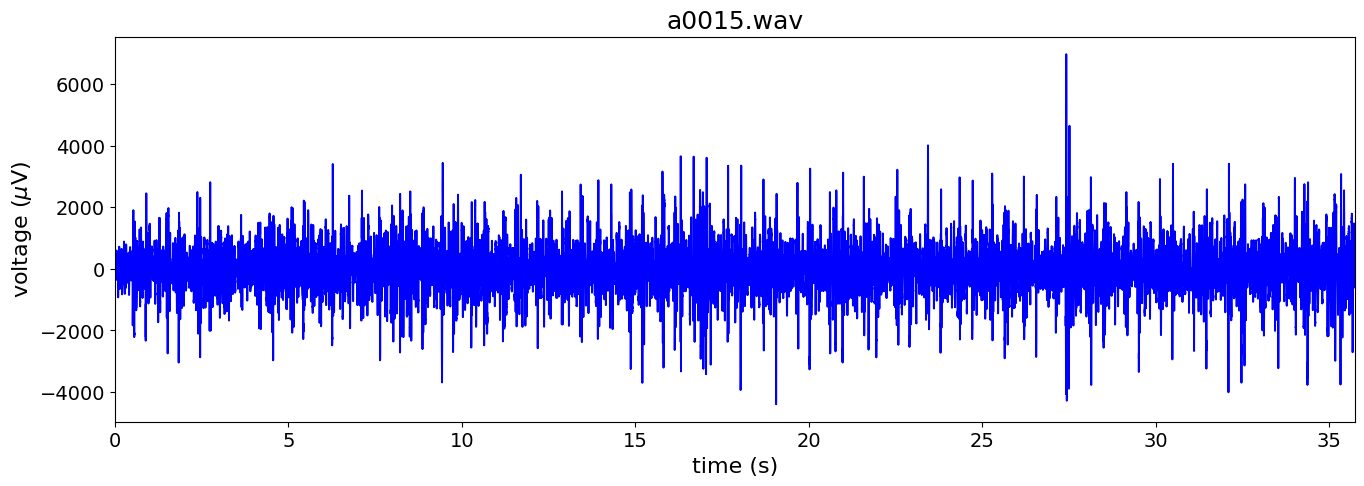

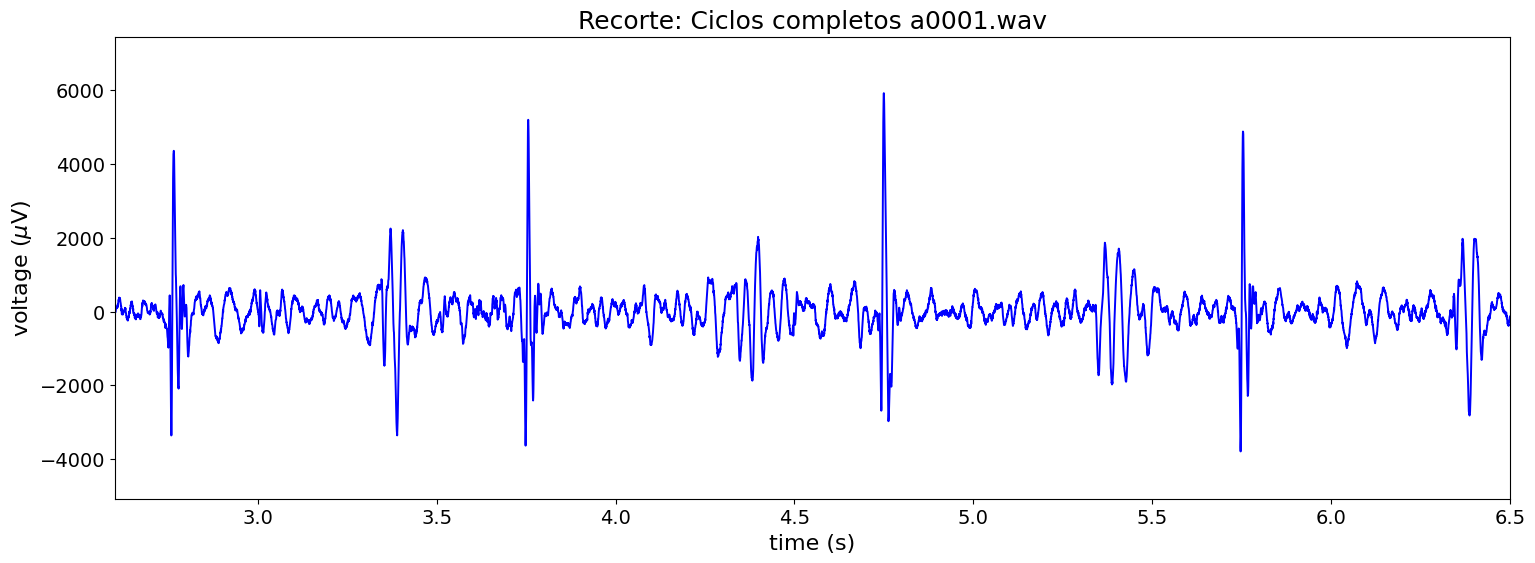

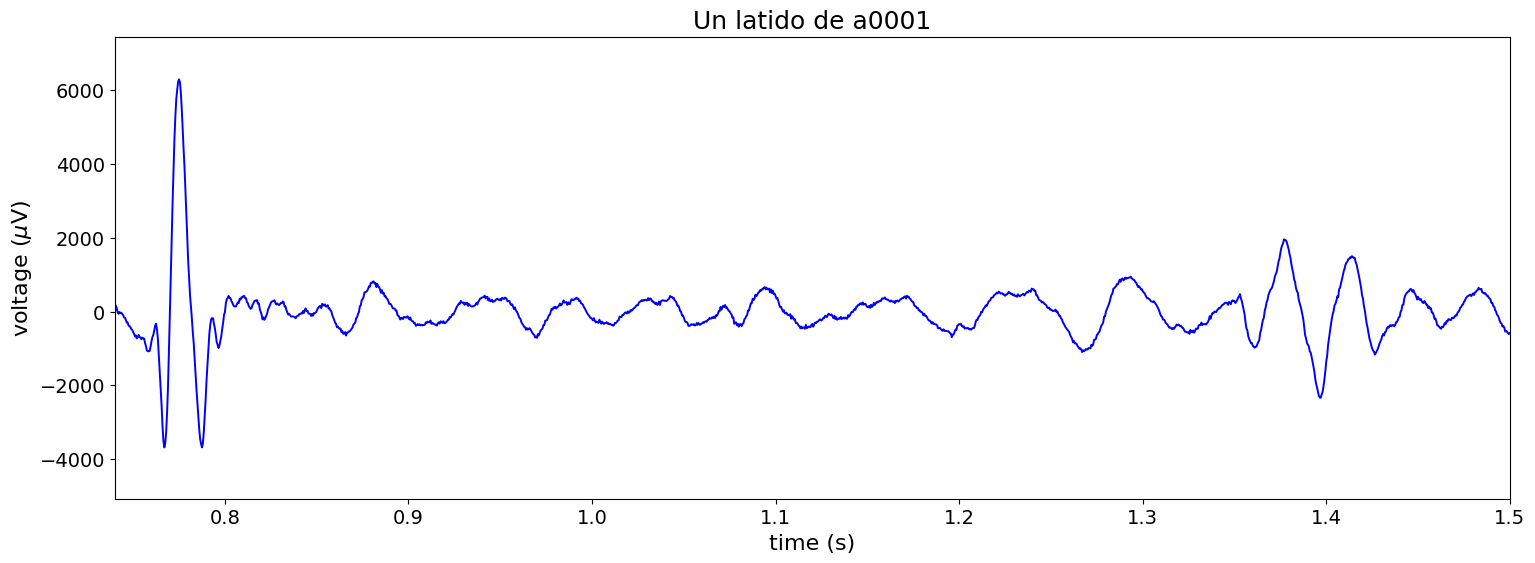

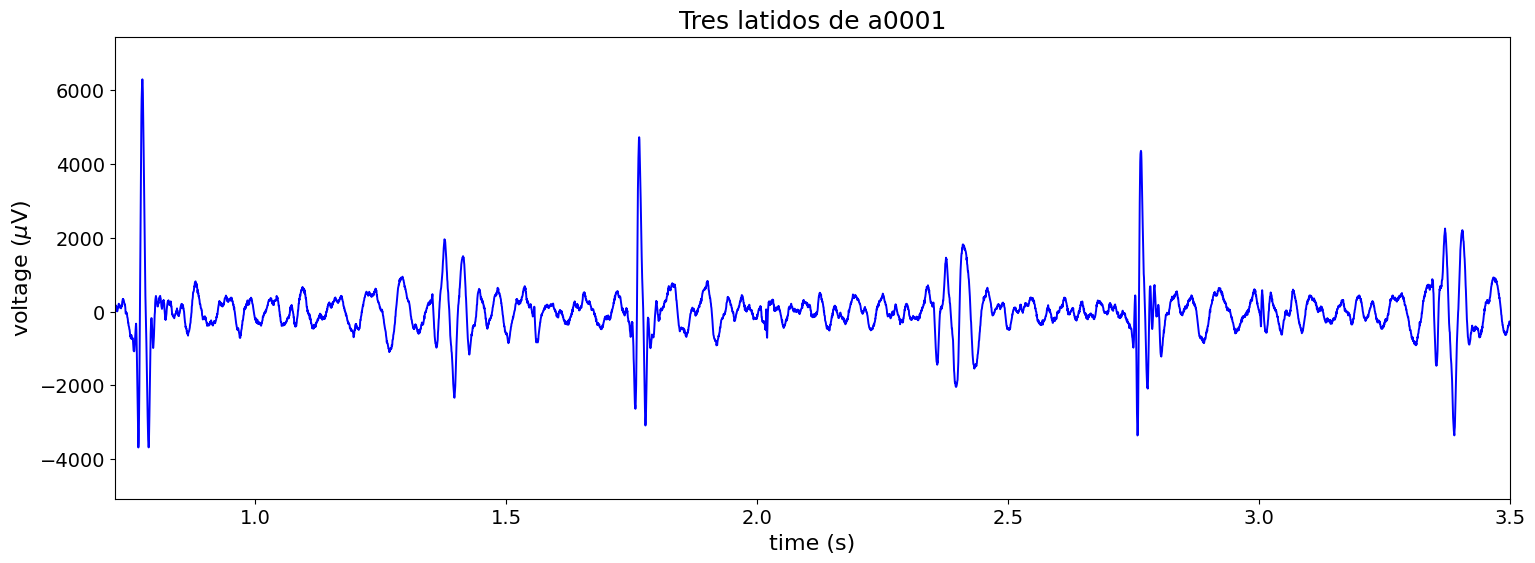

In [44]:
import numpy as np
import random as rd
import wave
import matplotlib.pyplot as plt
import sys
#from matplotlib.pyplot import figure
#from scipy.signal import butter, lfilter, filtfilt #for filtering data
from statistics import stdev
sys.path.insert(1, r'./../functions') # add to pythonpath

#%config InlineBackend.figure_formats = {'png', 'retina'}
plt.rcParams['axes.labelsize'] = 16 # fontsize for figure labels
plt.rcParams['axes.titlesize'] = 18 # fontsize for figure titles
plt.rcParams['font.size'] = 14 # fontsize for figure numbers
plt.rcParams['lines.linewidth'] = 1.4 # line width for plotting

def ecg(variable):
    record = wave.open(variable, 'r') # load the data
    # Get the number of channels, sample rate, etc.
    numChannels = record.getnchannels() # number of channels
    numFrames = record.getnframes() # number of frames
    sampleRate = record.getframerate() # sampling rate
    sampleWidth = record.getsampwidth()
    # Get wave data
    dstr = record.readframes(numFrames * numChannels)
    waveData = np.frombuffer(dstr, np.int16)
    # Get time window
    timeECG = np.linspace(0, len(waveData) / sampleRate,
num=len(waveData))
    return timeECG, waveData
#Test data
nice = ["a0001.wav","a0002.wav","a0003.wav","a0004.wav","a0005.wav","a0006.wav","a0007.wav","a0008.wav",\
        "a0009.wav","a0010.wav","a0011.wav","a0012.wav","a0013.wav","a0014.wav" ,"a0015.wav"]
#Obtaining data
for i in range(0, len(nice)):
    timeEMG, waveData = ecg(nice[i])
# Graficar los 15 audios
    plt.figure(figsize=(16,5))
    plt.xlabel(r'time (s)')
    plt.ylabel(r'voltage ($\mu$V)')
    plt.plot(timeEMG,waveData, 'b')
    plt.xlim(0,max(timeEMG))
    plt.title(nice[i])
    plt.show()
# Obtener grafico recortado del audio a0001 de forma que podamos
timeECG, waveData = ecg("a0001.wav")
n1 = .52
n2 = 1.3
m1 = int(n1*10000)
m2 = int(n2*10000)
plt.figure(figsize=(18,6))
plt.xlabel(r'time (s)')
plt.ylabel(r'voltage ($\mu$V)')
plt.plot(timeECG,waveData, 'b')
plt.xlim(timeECG[m1],timeECG[m2])
plt.title(r'Recorte: Ciclos completos a0001.wav')
plt.show()
# Un latido
plt.figure(figsize=(18,6))
plt.xlabel(r'time (s)')
plt.ylabel(r'voltage ($\mu$V)')
plt.plot(timeECG,waveData, 'b')
plt.xlim(.74,1.50)
plt.title("Un latido de a0001")
plt.show()
#Tres latidos
plt.figure(figsize=(18,6))
plt.xlabel(r'time (s)')
plt.ylabel(r'voltage ($\mu$V)')
plt.plot(timeECG,waveData, 'b')
plt.xlim(0.72,3.5)
plt.title("Tres latidos de a0001")
plt.show()


Ante las graficas anteriores, fue posible determinar la amplitud maxima existente, entre cada una de las senales analizadas, obteniendo que dicha amplitud alcanzo un valor de 30 mil microvoltios.
De igual forma, se observa que en cada una de las señales, el ciclo puede ser determinado por un latido completo, y que el mismo latido, esta conformado por dos pulsos, siendo uno mayor que el otro, y esto se debe al sonido percibido como un lup-dup que el corazon genera cuando late.
Por otro lado, al analizar individualmente la señal a0001, al observar las graficas tituladas como "Ciclos completos a0001.wav", "Un latido a0001.wav" y "Tres latidos a0001.wav", se puede determinar que un ciclo de dicha señal, se completa en un rango de tiempo entre 1 y 1.75 segundos, por lo que la fal promediarlo, se obtiene una frecuencia aproximada de 0.72 Hz.

A continuacion, se presenta el extracto del codigo, correspondiente a la Parte 2 del proyecto, donde el mismo pretende analizar los picos maximos de cada una de las señales seleccionadas anteriormente, y presentarlos en las graficas respectivas a las señales. De igual forma, el codigo tambien permite, tras haber determinado los puntos maximos, obtener a partir de los mismos, graficas de tiempo vr latidos del corazon que permitan determinar una frecuencia cardica promedio a partir de los latidos dados por minuto.
En este caso fue posible analizar solo 10 de las 15 señales seleccionadas anteriormente, esto debido a que el codigo presentaba problemas al analizar las 5 señales restantes.
Por otro lado, el codigo esta programado de forma que los picos maximos sean aquellos que superen cierto umbral, y dicho umbral esta determinado por la variable "ratios", como algunas señales presentaban amplitudes mucho mas bajas que otras, entonces se adapto el codigo para que hubiese esta variable "ratios", y que la misma estableciece un umbral disinto para cada señal y enocontar con eficacia los picos de cada una.
Las senales analizadas para esta segunda parte, fueron las siguientes: a0001.wav,a0002.wav,a0003.wav,a0006.wav,a0007.wav,a0008.wav,a0010.wav,a0011.wav,a0013.wav,a0015.wav

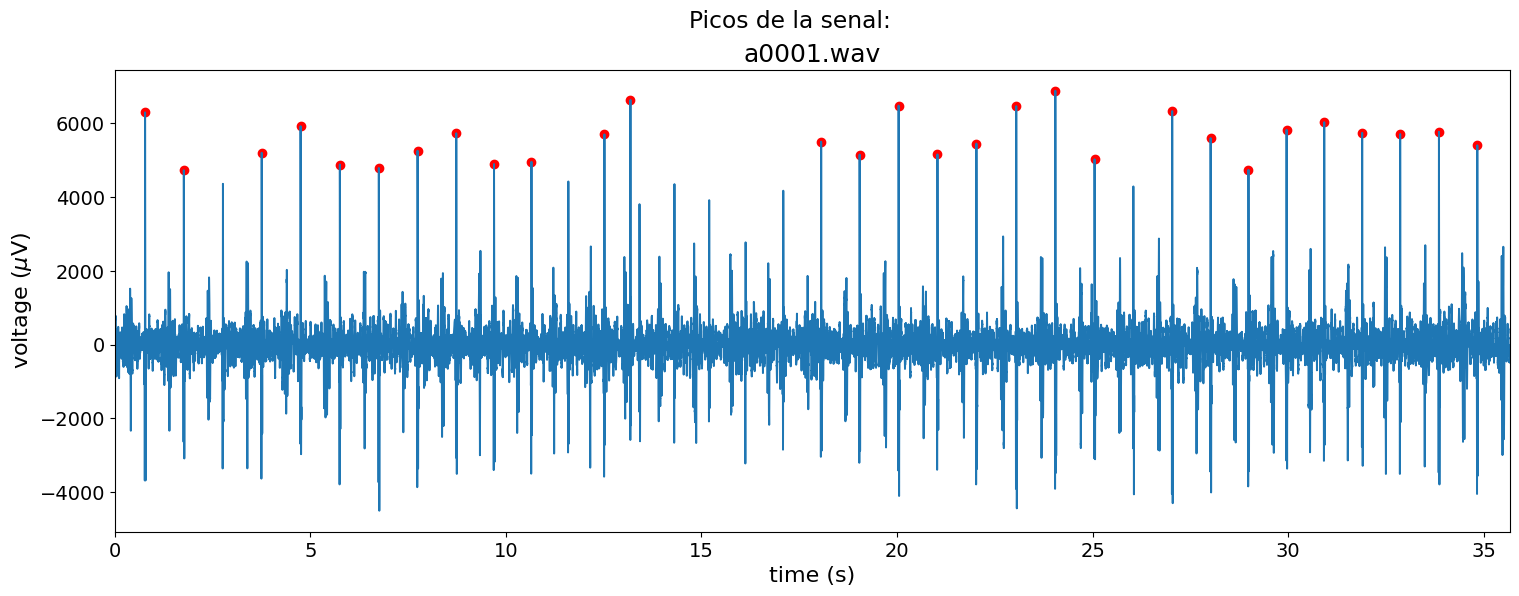

Beats per minute a0001.wav : 48.7859586160489


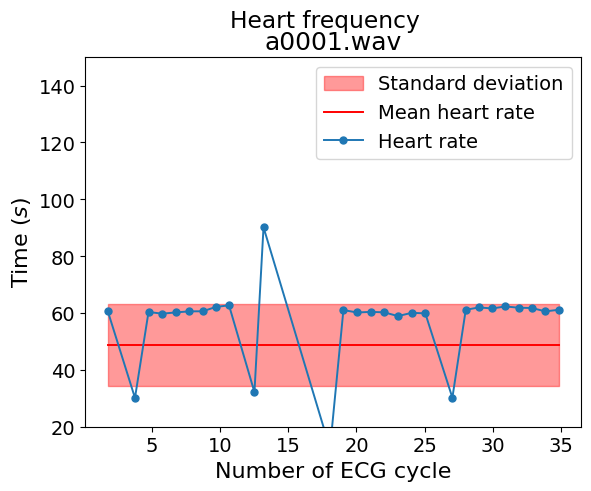

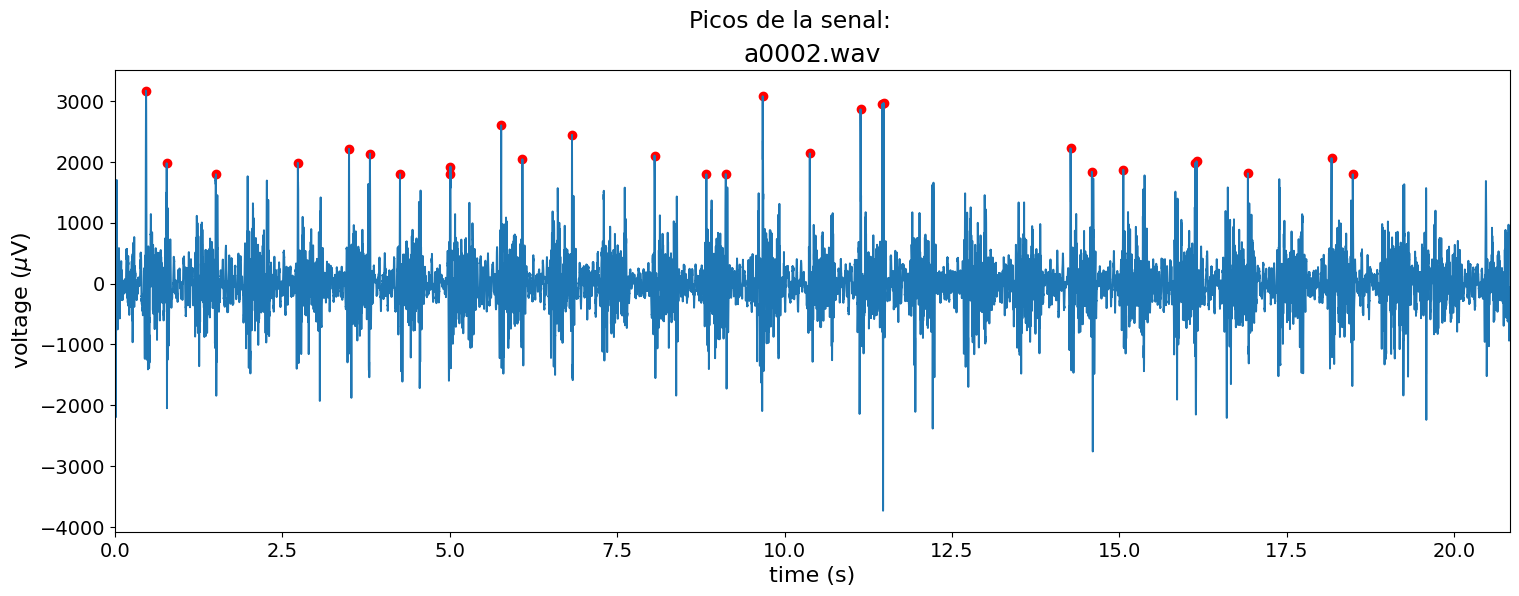

Beats per minute a0002.wav : 80.65871282137456


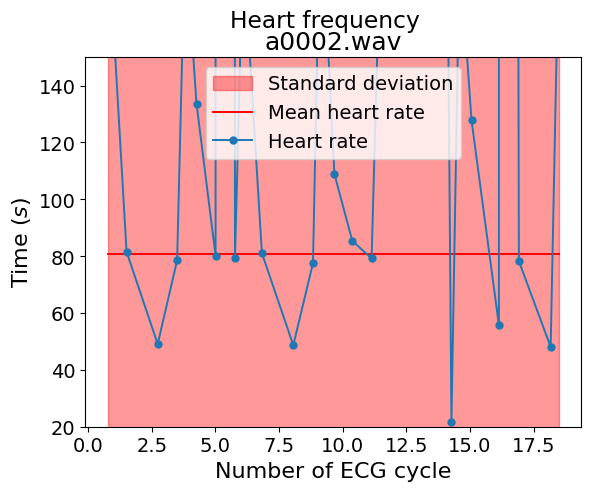

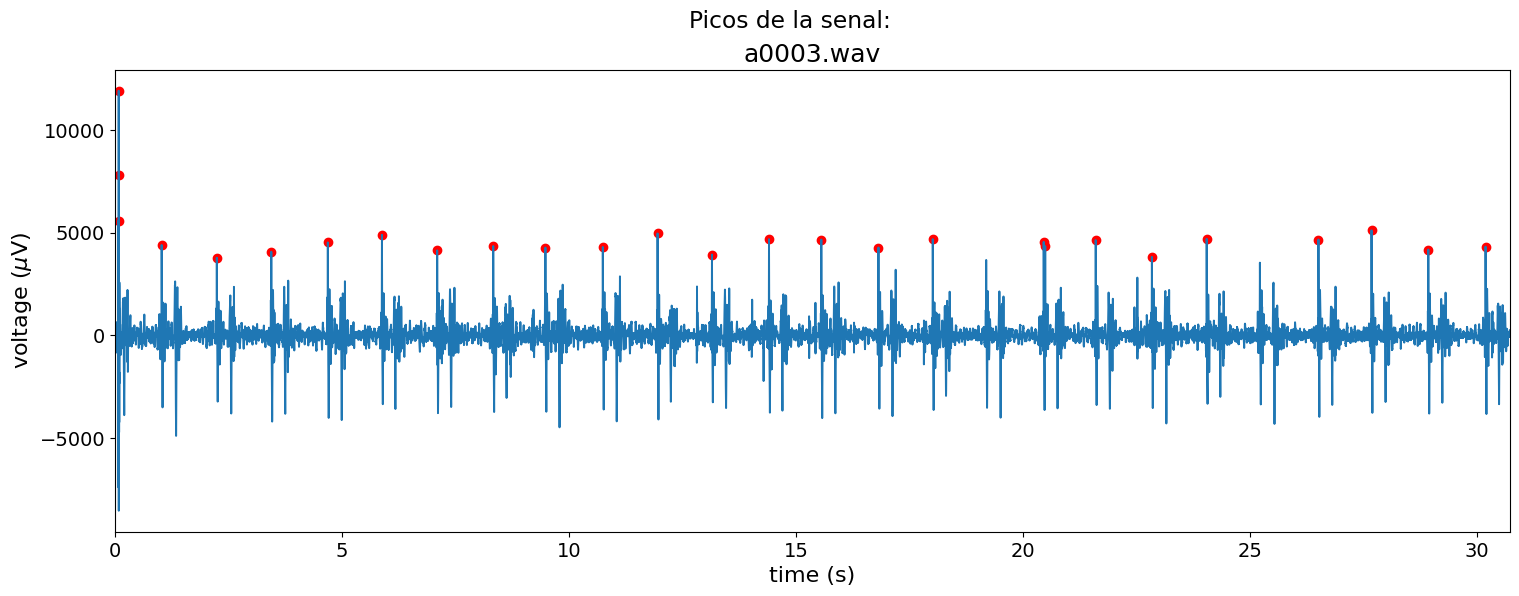

Beats per minute a0003.wav : 52.734375


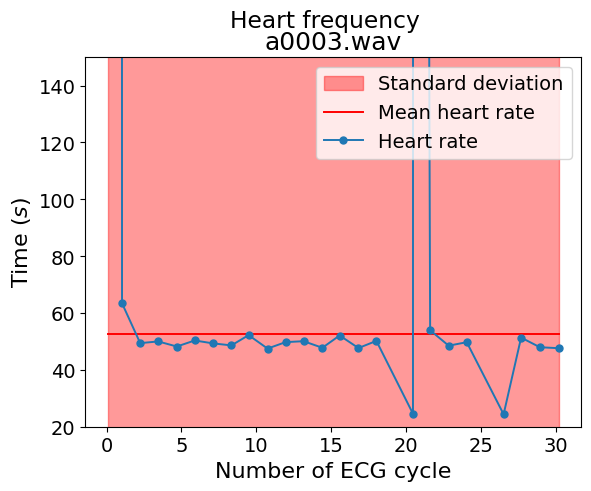

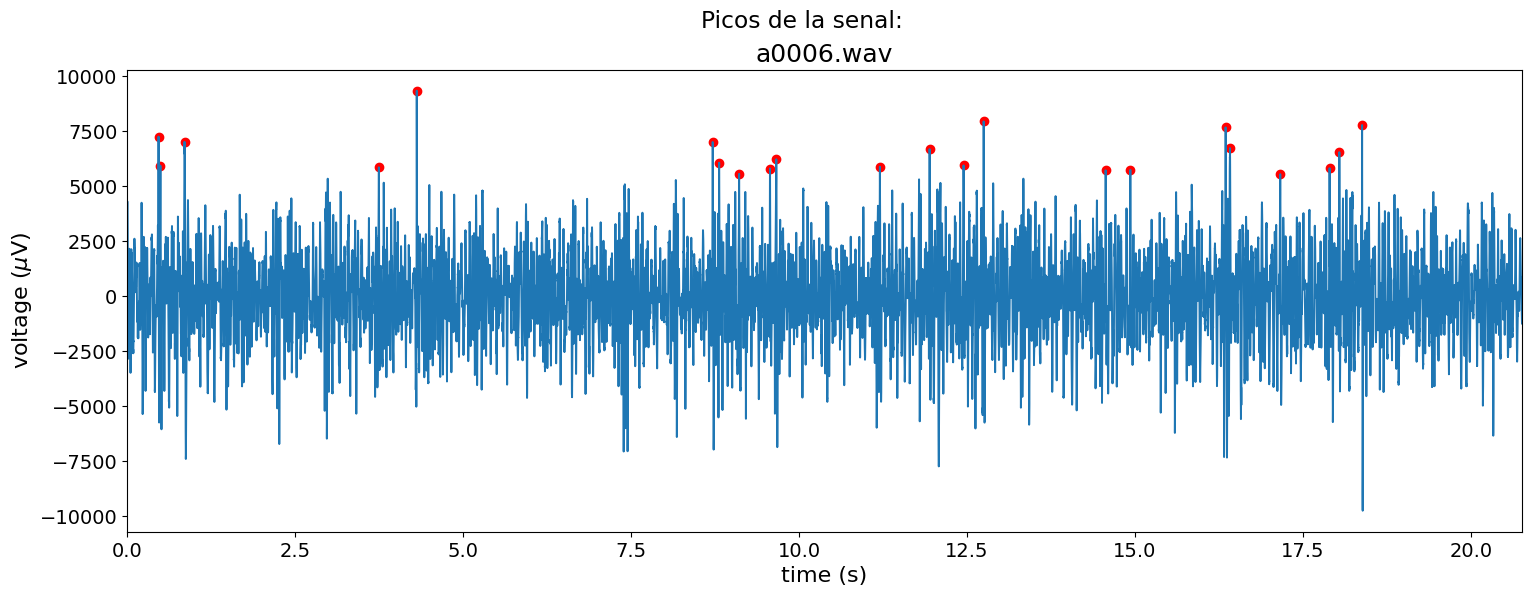

Beats per minute a0006.wav : 63.58687798063491


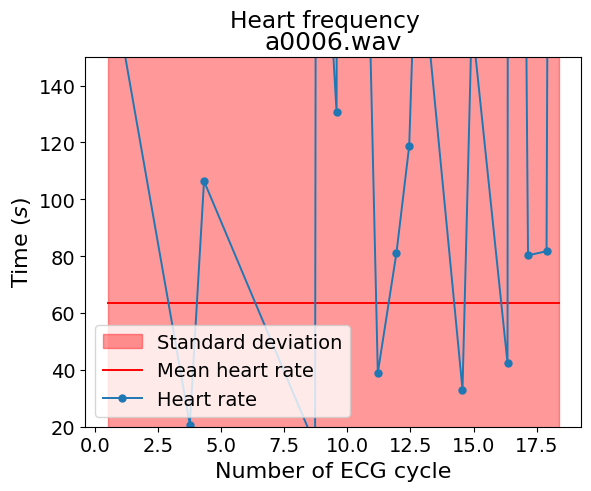

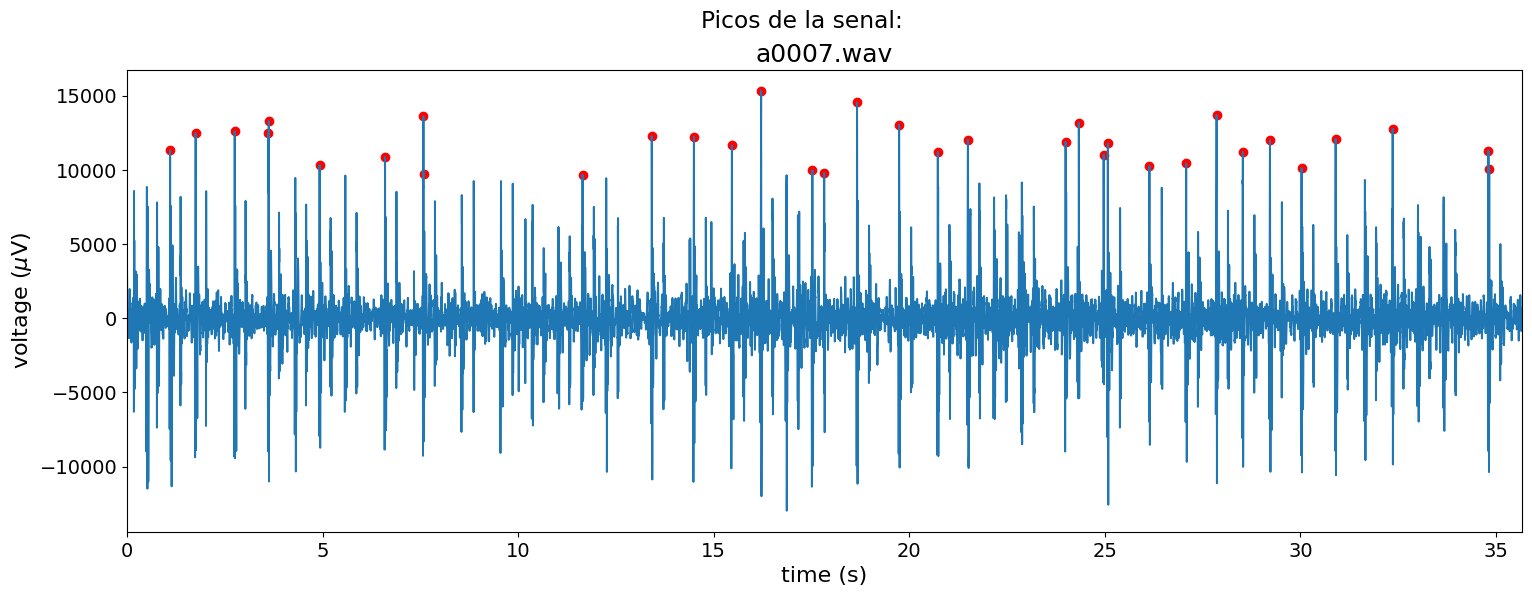

Beats per minute a0007.wav : 57.19733079122975


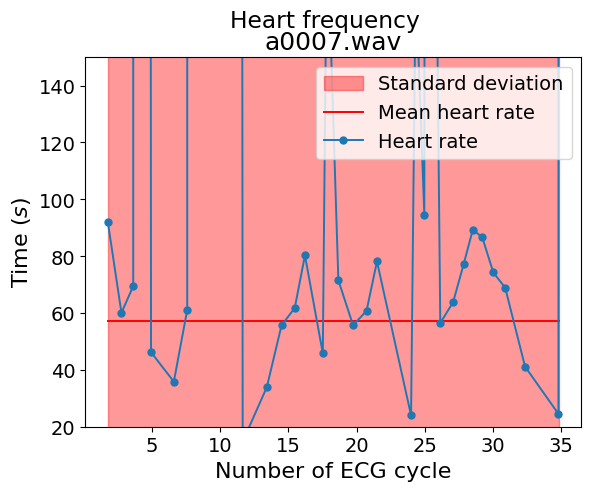

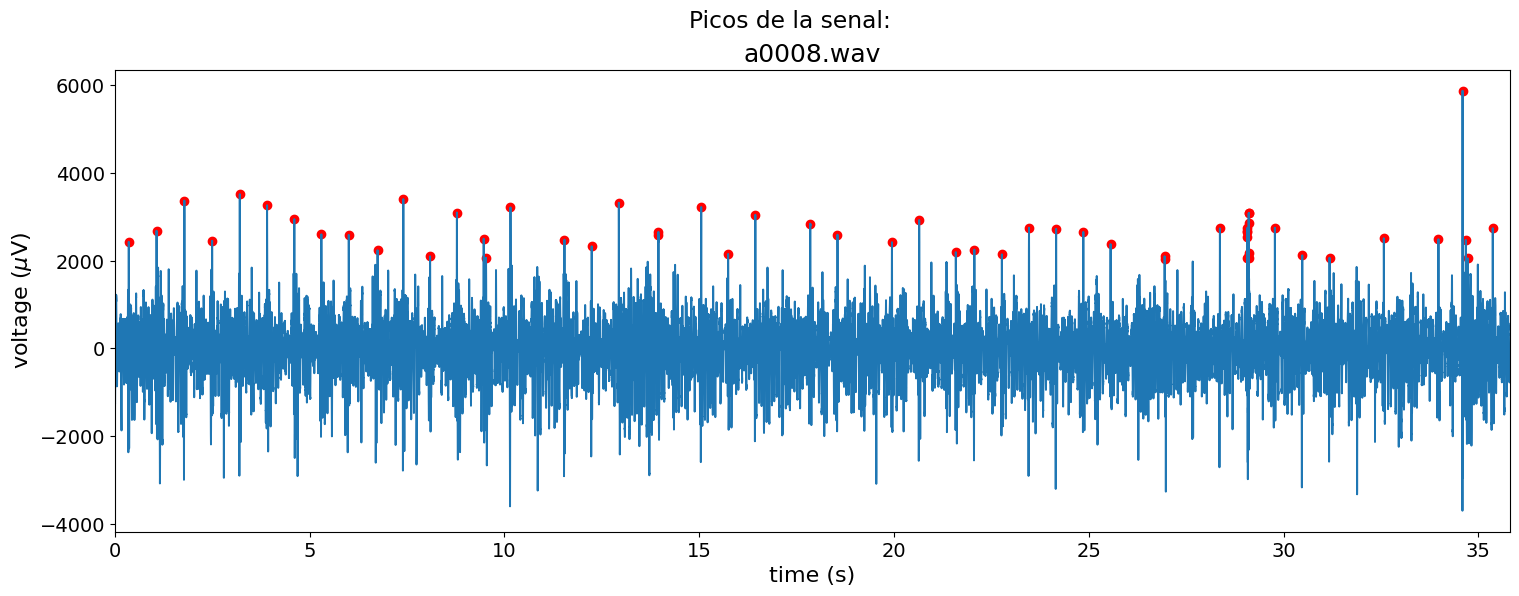

Beats per minute a0008.wav : 97.19177221376604


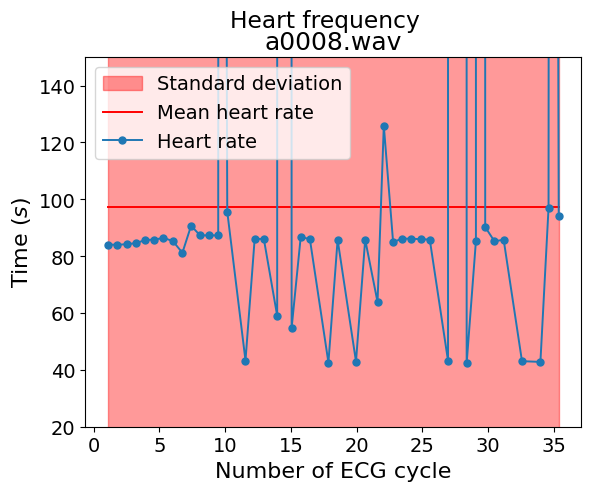

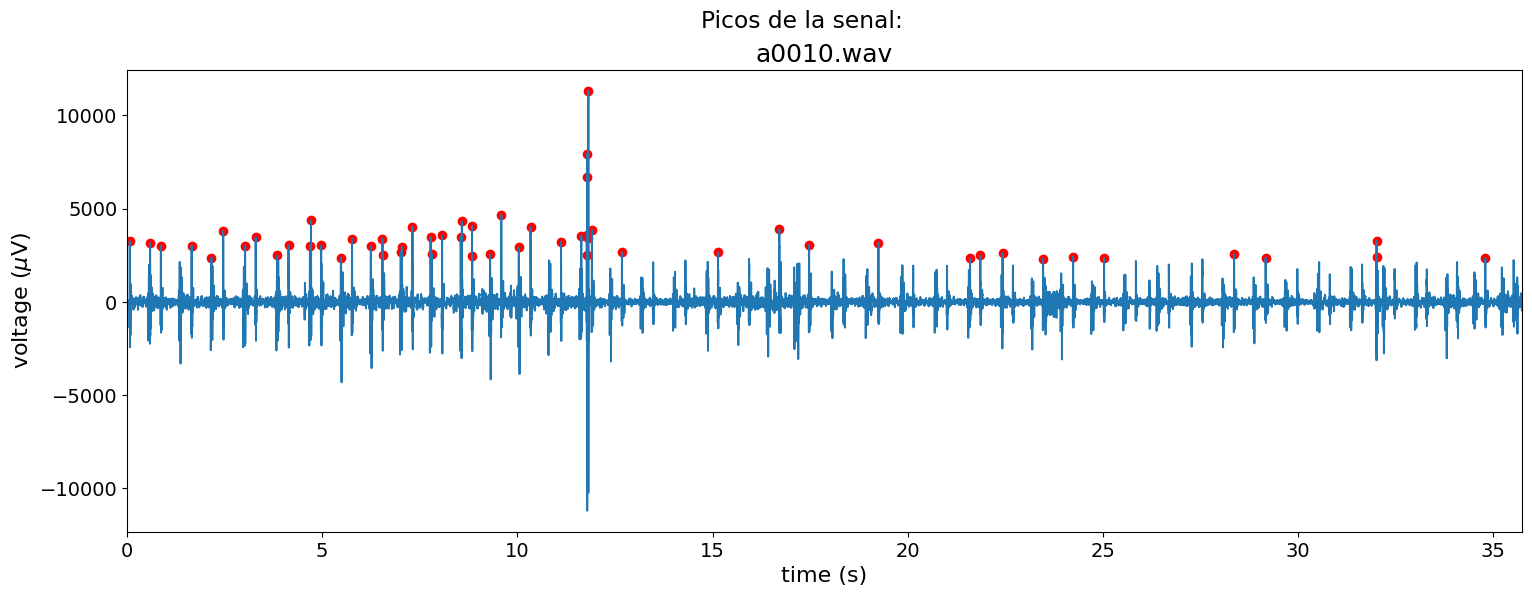

Beats per minute a0010.wav : 95.70181329751512


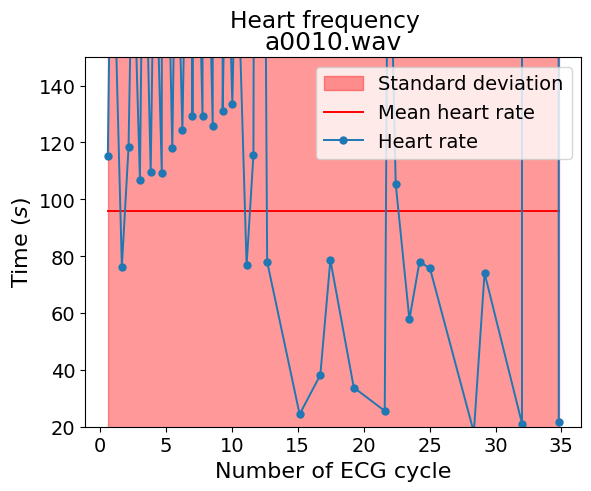

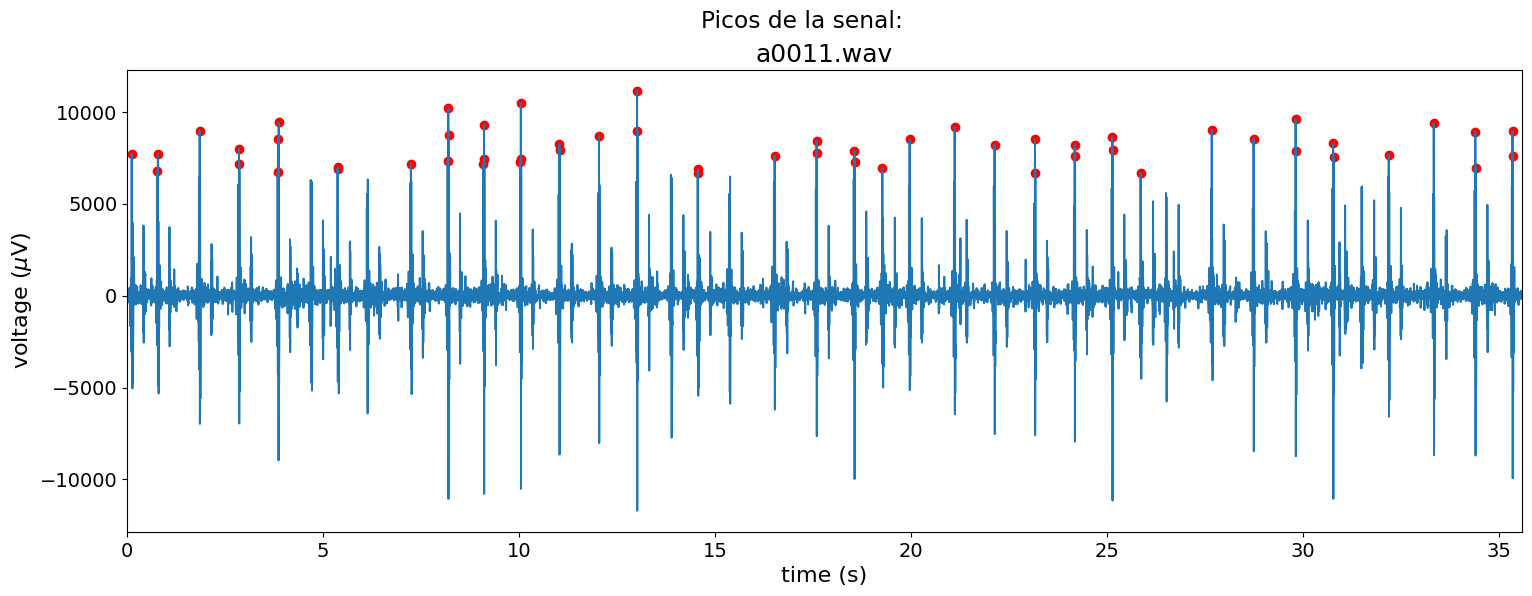

Beats per minute a0011.wav : 94.39130251569678


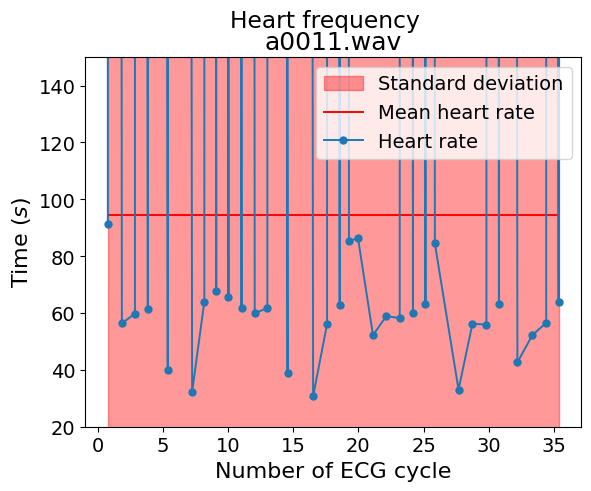

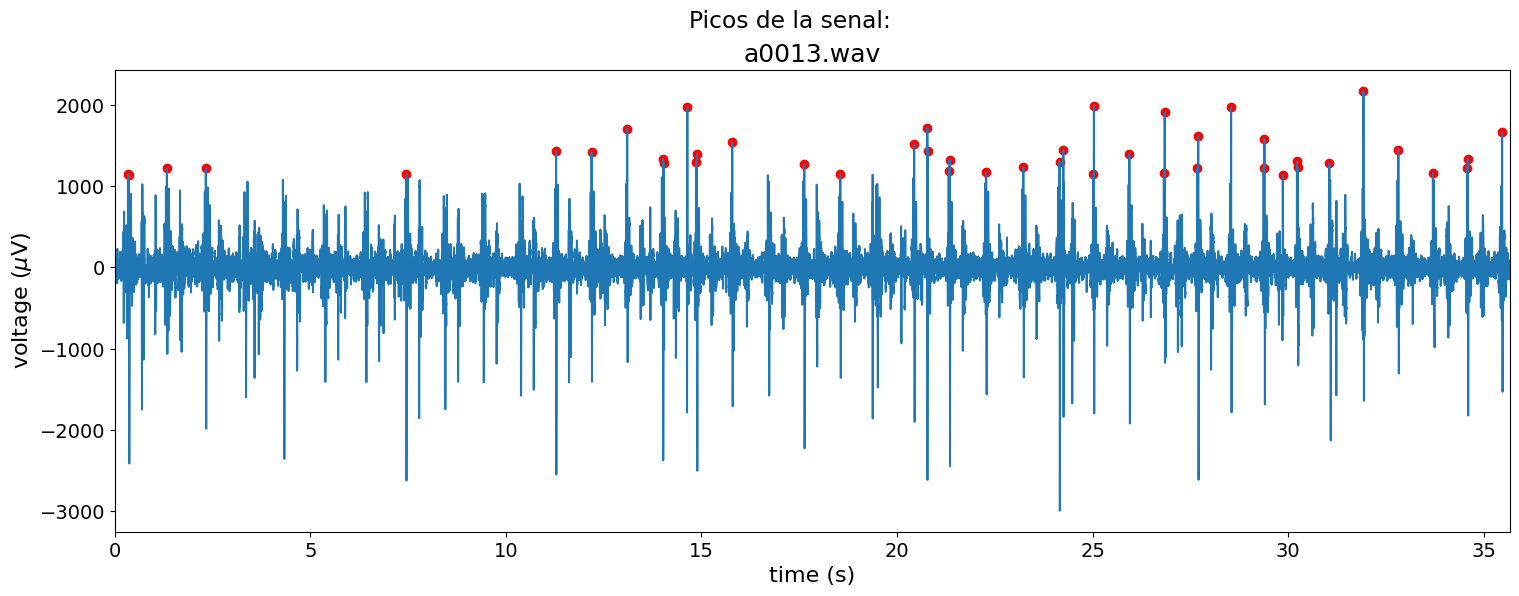

Beats per minute a0013.wav : 75.70234957662761


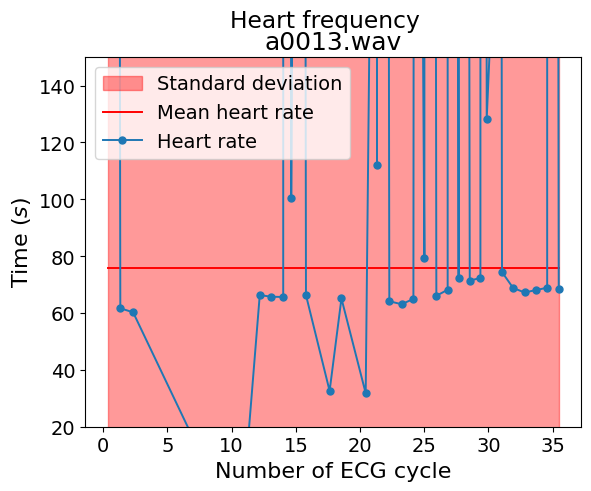

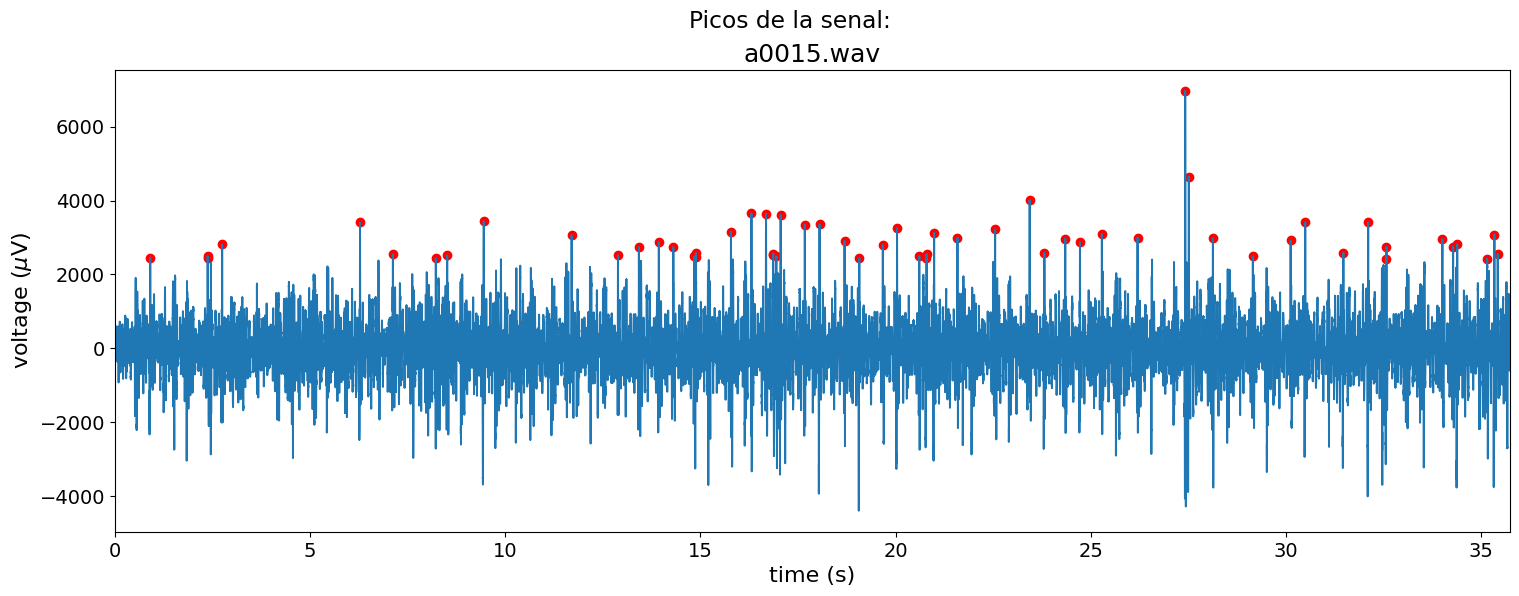

Beats per minute a0015.wav : 97.38079247817328


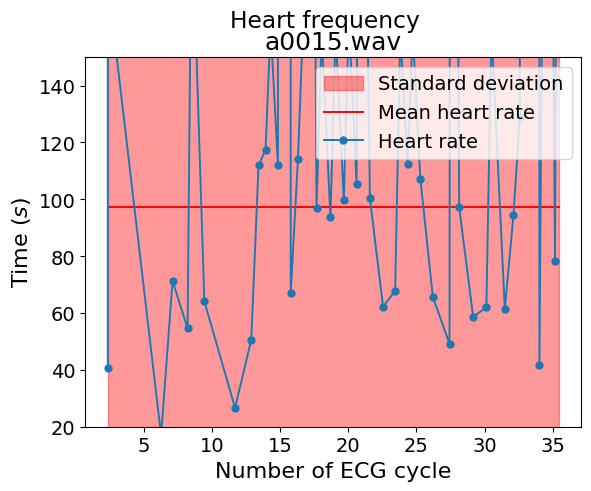

In [6]:
#Test data
m1 = int(n1*10000)
m2 = int(n2*10000)
nice = ["a0001.wav","a0002.wav","a0003.wav","a0006.wav","a0007.wav","a0008.wav","a0010.wav","a0011.wav","a0013.wav","a0015.wav"]
ratios = [0.8, 0.8, 0.6, 0.8, 0.8,0.6,0.6,0.8,0.8,0.6]

def detecta_maximos_locales(timeECG, waveData, threshold_ratio=0.8):
    # If not all the R peaks are detected, lower the threshold_ratio
    # If components that are not R peaks (like T waves) are detected, up the threshold_ratio

    if len(timeECG) != len(waveData):  # Raises an error if two arrays have different lengths
        raise Exception("The two arrays have different lengths.")

    interval = max(waveData) - min(waveData)
    threshold = threshold_ratio * interval + min(waveData)
    maxima = []
    maxima_indices = []
    mxs_indices = []
    banner = False

    for i in range(0, len(waveData)):

        if waveData[i] >= threshold:  # If a threshold value is surpassed,
            # the indices and values are saved
            banner = True
            maxima_indices.append(i)
            maxima.append(waveData[i])

        elif banner == True and waveData[i] < threshold:  # If the threshold value is crossed
            # the index of the maximum value in the original array is saved
            index_local_max = maxima.index(max(maxima))
            mxs_indices.append(maxima_indices[index_local_max])
            maxima = []
            maxima_indices = []
            banner = False

    return mxs_indices

#Obtaining data
for i in range(0, len(nice)):
    timeECG, waveData = ecg(nice[i])
    
    
    mxs_indices = detecta_maximos_locales(timeECG, waveData,ratios[i])
    plt.figure(figsize=(18,6))
    plt.xlabel(r'time (s)')
    plt.ylabel(r'voltage ($\mu$V)')
    plt.xlim(min(timeECG),max(timeECG))
    plt.title(nice[i])
    plt.suptitle("Picos de la senal:")
    plt.plot(timeECG, waveData)
    plt.scatter(timeECG[mxs_indices], waveData[mxs_indices], color='r')
    plt.show()
    
    
    # Close up from an initial second to an end second
   # init_sec = 0
    #end_sec = 3
    #plt.figure(figsize=(18,6))
   #  plt.ylabel(r'voltage ($\mu$V)')
  #  plt.xlim(timeECG[init_sec*1000],timeECG[end_sec*1000])
 #   plt.plot(timeECG[init_sec*1000:end_sec*1000], waveData[init_sec*1000:end_sec*1000])
  #  plt.scatter(timeECG[mxs_indices], waveData[mxs_indices], color='r')
   # plt.show()
    
    mean_bpm = 60*(len(mxs_indices)/(timeECG[-1]-timeECG[0]))
    print("Beats per minute",nice[i],":", mean_bpm)
    
    
    heart_rate = [(60/(timeECG[mxs_indices[i+1]]-timeECG[mxs_indices[i]])) \
                  for i in range(0, len(mxs_indices)-1)]
    time = timeECG[mxs_indices]
    
    mean_vec = [mean_bpm for i in range(0, len(time)-1)]
    std_vec_plus = [mean_bpm+stdev(heart_rate) for i in range(0, len(time)-1)]
    std_vec_minus = [mean_bpm-stdev(heart_rate) for i in range(0, len(time)-1)]
    plt.fill_between(time[1:], std_vec_minus, std_vec_plus, facecolor="red",
                     label = "Standard deviation", color='red', alpha=0.4)
    plt.plot(time[1:], mean_vec, c="r", label = "Mean heart rate")
    plt.plot(time[1:], heart_rate, markersize=5, marker = "o", label="Heart rate")
    plt.ylim((20, 150))
    plt.suptitle("Heart frequency")
    plt.title(nice[i])
    plt.xlabel(r'Number of ECG cycle')
    plt.ylabel(r'Time ($s$)')
    plt.legend()
    plt.show()

In [ ]:
A partir de las graficas y el valor de latidos por minuto, obtenidas del codigo anterior, se logro aproximar las frecuencias cardiacas en cada una de las
señales, siendo los siguientes
Señal a0001.wav
    0.8 Hz
Señal a0002.wav
    1.33 Hz
Señal a0003.wav
    0.86
Señal a0006.wav
    1.05 Hz
Señal a0007.wav
    0.95 Hz
Señal a0008.wav
    1.62 Hz
Señal a0010.wav
    1.58 Hz
Señal a0011.wav
    1.56 Hz
Señal a0013.wav
    1.25 Hz
Señal a0015.wav
    1.61 Hz